In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os

In [4]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
dataset=['black','slumlordreach']
results_sub_parcels=[]
for story in dataset:
    if story=='black':
        subs=black_subs
    if story=='slumlordreach':
        subs=slumlordreach_subs
    for sub in subs:
        results_sub_parcels.append(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
results_sub_parcels=np.asarray(results_sub_parcels)
noise_ceilings_parcels=np.mean(results_sub_parcels,axis=0)
parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/slumlordreach_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')
noise_volume=np.zeros(parcellation.shape)
for p in range(1000):
    noise_volume[np.where(parcellation==p+1)]=np.arctanh(noise_ceilings_parcels[p])

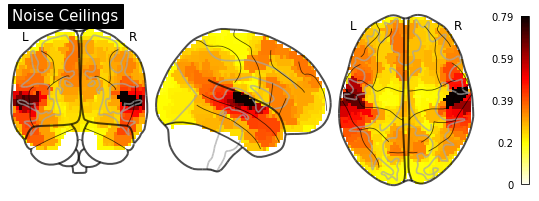

In [6]:
niplt.plot_glass_brain(nib.Nifti1Image(noise_volume,parcellation_nii.affine),title="Noise Ceilings",colorbar=True)

In [5]:
d="/jukebox/griffiths/bert-brains/"
#mask=nib.load(d+"21styear_data/whole_brain_mask.nii.gz").get_fdata().astype('bool')
def get_result_combined(result_dir,threshold=0.95):
    nii=nib.load(result_dir+"two_story_combined_mean.nii.gz")
    affine=nii.affine
    result_volume=nii.get_fdata()
    if threshold>0:
        p_value_nii=nib.load(result_dir+"combined_bootstrap_pvalue_parcellation.nii.gz")
        p_value_volume=p_value_nii.get_fdata()
        binary_volume=p_value_volume>=threshold
        result_volume=result_volume*binary_volume
        result_volume=(np.arctanh(result_volume)/noise_volume)*100.0
        result_volume[np.isnan(result_volume)]=0.0
    return nib.Nifti1Image(result_volume,affine)

black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

def get_result_dataset(result_dir,threshold=0.95,normalize_isc=False):
    if 'slumlordreach' in result_dir:
        subs=slumlordreach_subs
    else:
        subs=black_subs
    
    result_volume=np.mean([nib.load(result_dir+sub+"_parcels_encoding.nii.gz").get_fdata() for sub in subs],axis=0)
    affine=nib.load(result_dir+subs[0]+"_parcels_encoding.nii.gz").affine 
    if threshold>0:
        p_value_nii=nib.load(result_dir+"individual_bootstrap_pvalue_parcellation.nii.gz")
        p_value_volume=p_value_nii.get_fdata()
        binary_volume=p_value_volume>=threshold
        result_volume=result_volume*binary_volume
    return nib.Nifti1Image(result_volume,affine)
    
    
    
    
    
    

In [8]:
"""
reps_of_interest=['bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy','bert-base-uncased_syntactic_complexity_L-1_T-128_D-concat.npy','bert-base-uncased_syntactic_complexity_L-inf_T-10_D-concat.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-fwd.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-bck.npy','bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy',
'bert-base-uncased_syntactic_distance_T-128_D-concat.npy']
"""
reps_of_interest=['bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy']
#os.listdir(layer_prefix)

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


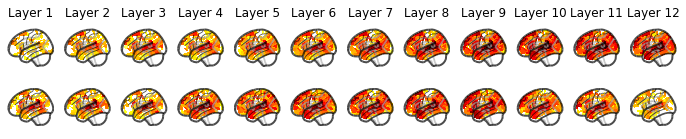

In [15]:
fig,axarr=plt.subplots(nrows=2,ncols=12,figsize=(12,2))

for row_num,layer_names in enumerate([['layer_'+str(i)+"_activations" for i in range(0,12)] ,['layer_'+str(i)+"_z_representations" for i in range(0,12)] ]):
    #layer_names=['layer_'+str(i)+"_z_representations" for i in range(0,12)] 
    #layer_names=['layer_'+str(i)+"_activations" for i in range(0,12)] 
    save_prefix=d+"results/slumlordreach/"
    save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]
    result_dirs=save_dirs
    for i,result_dir in enumerate(result_dirs):
        if 'syntactic' in layer_names[i]:
            title='Attention Scores'
        else:
            title=layer_names[i]
        if i==0:
            on=False 
        else:
            on=False 
        niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=on,vmax=35,display_mode='l',axes=axarr[row_num][i])
        axarr[0][i].set_title("Layer "+str(i+1))
plt.savefig('plots_for_sam/figure3_brainplots.svg',format='svg')

In [ ]:
niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=on,vmax=35,display_mode='l',axes=axarr[row_num][i])

In [30]:
niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=True,vmax=35,display_mode='l',output_file='colorbarbrain.svg')

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


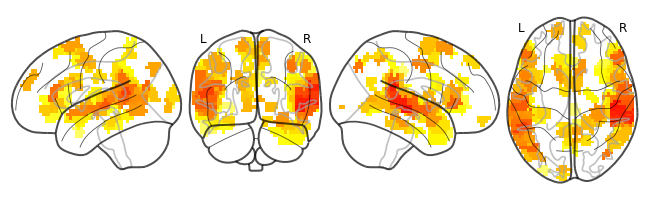

In [7]:
d="/jukebox/griffiths/bert-brains/"
layer_name='ling_features'
save_prefix=d+"results/slumlordreach/"
result_dir=save_prefix+"encoding-"+layer_name+"/" 
niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=False,title='',vmax=33,display_mode='lyrz')
plt.savefig('ling_features_glass_brain.svg',format='svg')

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


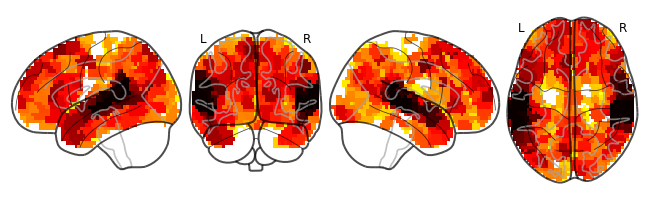

In [9]:
d="/jukebox/griffiths/bert-brains/"
layer_name='full_z'
save_prefix=d+"results/slumlordreach/"
result_dir=save_prefix+"encoding_"+layer_name+"/" 
niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=False,title='',vmax=33,display_mode='lyrz')
plt.savefig('full_z_glass_brain.svg',format='svg')

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


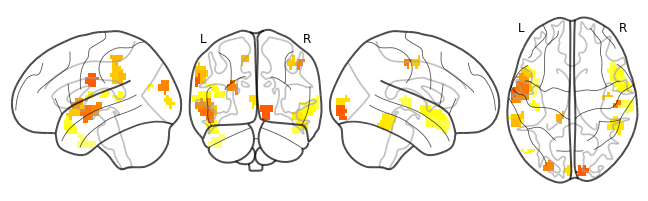

In [6]:
d="/jukebox/griffiths/bert-brains/"
layer_name='onerep'
save_prefix=d+"results/slumlordreach/"
result_dir=save_prefix+"encoding_"+layer_name+"/" 
niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=False,title='',vmax=33,display_mode='lyrz')

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


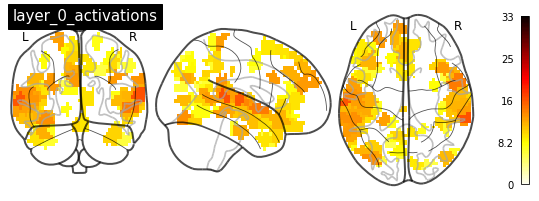

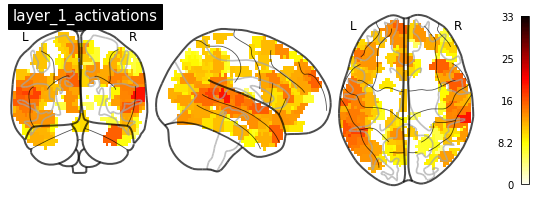

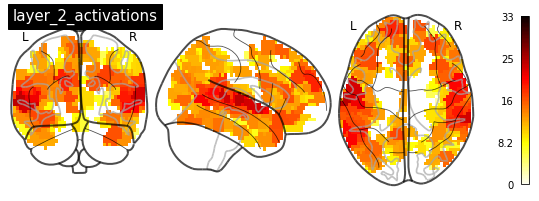

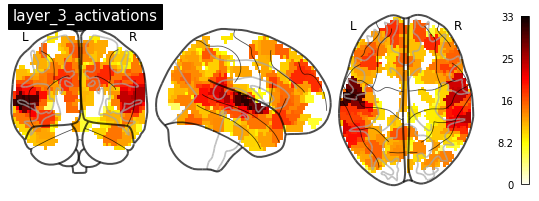

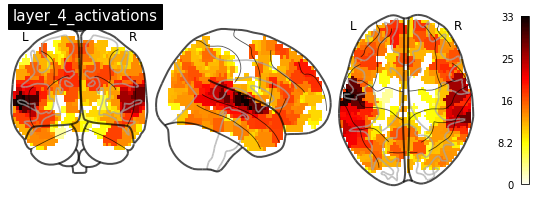

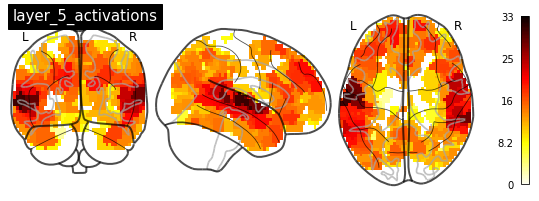

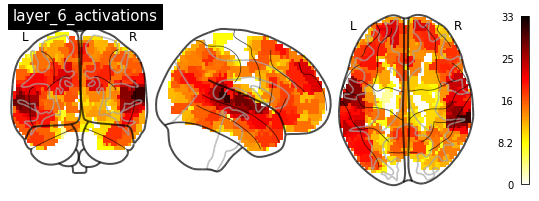

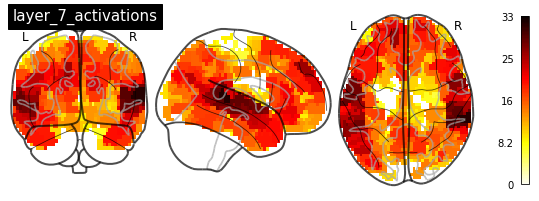

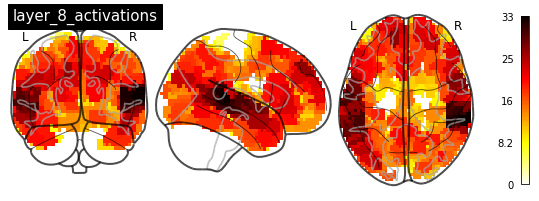

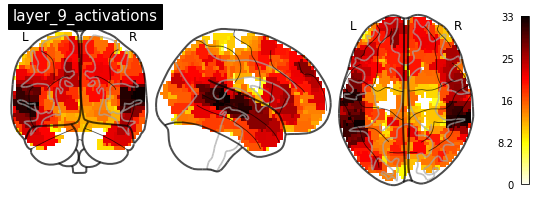

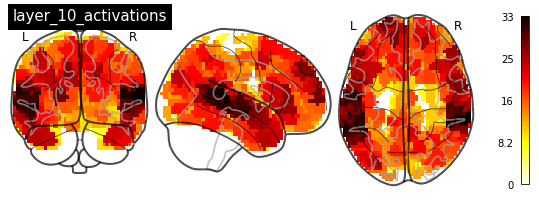

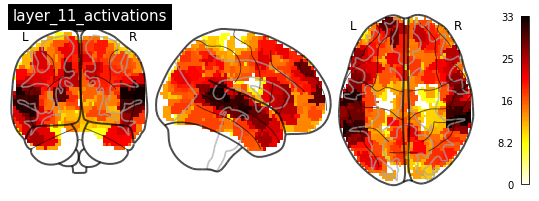

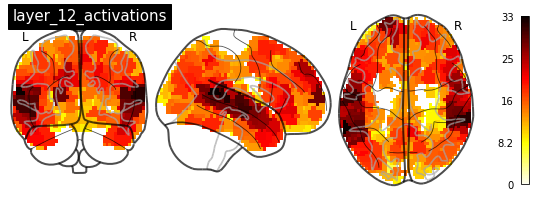

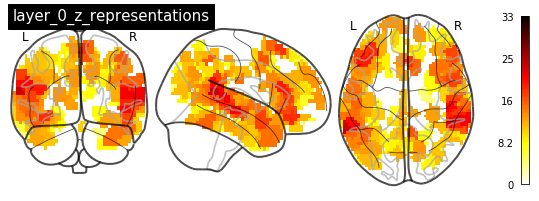

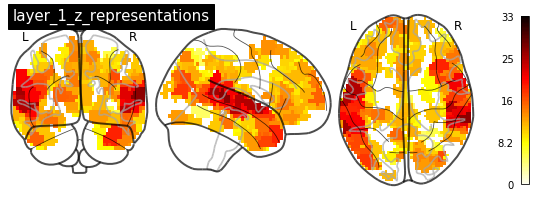

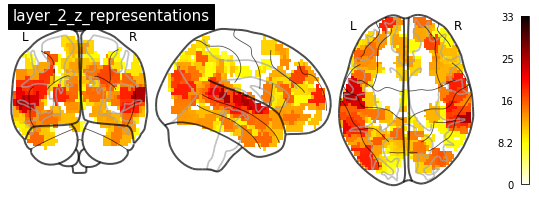

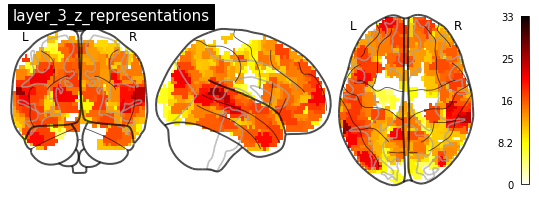

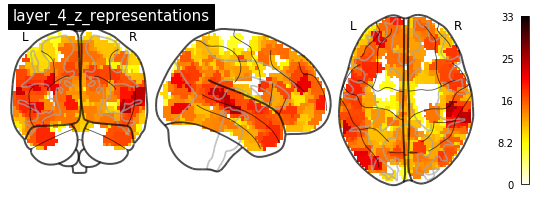

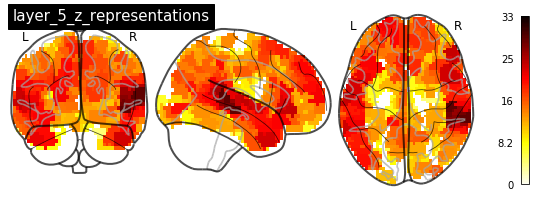

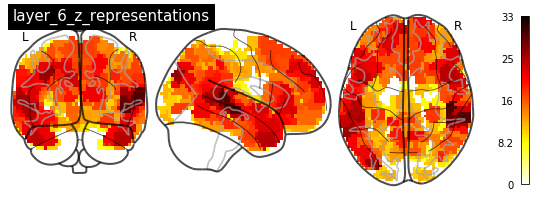

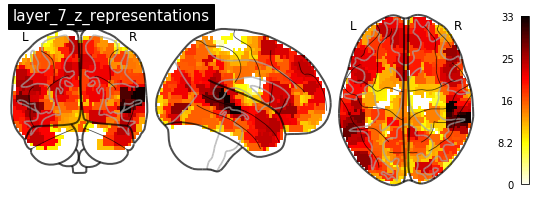

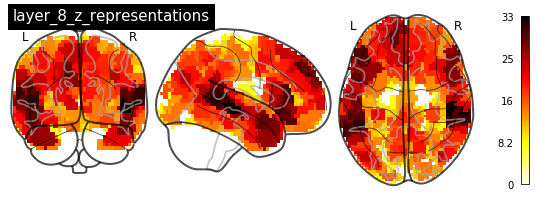

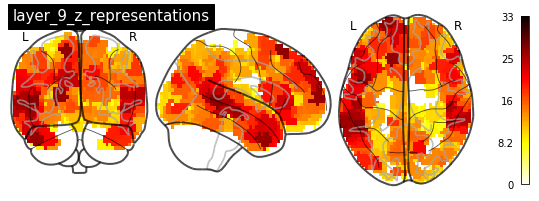

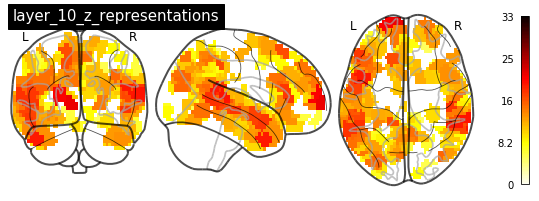

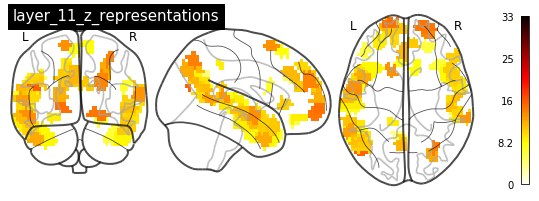

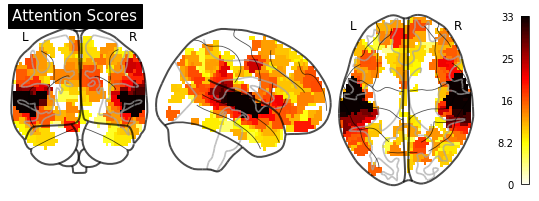

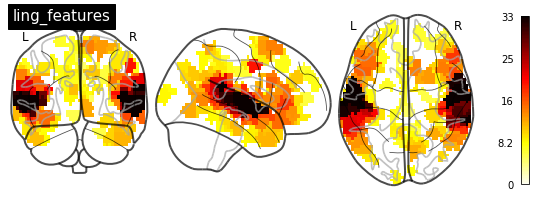

In [7]:
#Plots now reflect percent noise ceiling. 
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
save_prefix=d+"results/slumlordreach/"
save_dirs=[save_prefix+"encoding-"+layer+"/" for layer in layer_names]

for i in range(12):
    layer='layer_'+str(i)+"_z_representations"
    layer_names.append(layer) 
    save_dirs.append(save_prefix+"encoding-"+layer+"/")

layer_prefix=d+'code/bert-brains/data/slumlordreach/bert-base-uncased/syntactic_analyses/'
for fname in os.listdir(layer_prefix):
    of_interest=False
    for rep in reps_of_interest:
        if rep in fname:
            of_interest=True 

    if of_interest:
        layer_names.append(fname[:-4])
        save_dirs.append(save_prefix+'encoding-'+fname[:-4]+"/")
result_dirs=save_dirs
layer_names.append('ling_features')
result_dirs.append(save_prefix+"encoding-ling_features/")
for i,result_dir in enumerate(result_dirs):
    if 'syntactic' in layer_names[i]:
        title='Attention Scores'
    else:
        title=layer_names[i]
    niplt.plot_glass_brain(get_result_combined(result_dir,threshold=0.95),colorbar=True,title=title,vmax=33)


